In [1]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numba import jit
import time

In [2]:
fitness_per_eval = []
fitness_per_iter = []

In [3]:
spheredf = pd.read_csv('../data/sphere.csv')
f_biasdf = pd.read_csv('../data/f_bias.csv')

sphere = spheredf.fvalue.values
f_bias = f_biasdf.fvalue.values

In [4]:
f_xstar = f_bias[0]
search_space = (-100,100)

In [5]:
@jit(nopython=True)
def fsphere(x, dim):
    F = 0
    for i in range(dim-1):
        z = x[i]-sphere[i]
        F += z*z
    result = F + f_bias[0]
  
    return result

In [6]:
def f(x,dim):
    result = fsphere(x,dim)
    fitness_per_eval.append(result-f_xstar)
    return result

In [7]:
def callback_f(xk):
     result = fsphere(xk,D)
     fitness_per_iter.append(result-f_xstar)

In [8]:
def initial_solution(dim,bounds):
    # bounds
    xmin, xmax = bounds
    x_min = xmin * np.ones(D)
    x_max = xmax * np.ones(D)
    cur_x = np.random.uniform(min(x_min), max(x_max), (1, D))
    return cur_x

In [9]:
def optimize_minimize(dim,search_space,method,options):
    global fitness_per_eval
    global fitness_per_iter
    
    fitness_per_eval = []
    fitness_per_iter = []
    
    result=None
    cur_x = initial_solution(dim,search_space)
    t0 = time.time()
    result = optimize.minimize(f, args=(dim), x0=cur_x, method=method, options=options, callback=callback_f)
    t1 = time.time()
    return result, t1-t0

In [10]:
D = 50

# method = 'L-BFGS-B'
# options = {'maxiter': 100, 'gtol': 1e-5, 'disp': False}
method = 'SLSQP'
options = {'maxiter': 100, 'ftol': 1e-5, 'disp': False}

result, duration = optimize_minimize(D,search_space,method,options)

In [18]:
print("Algorithm: %s" % method)
print("Parameters: %s" % options)
print("Solution: %f - Fitness: %f" % (result.fun,fitness_per_eval[-1]))
print("Nb of functions evaluations: %d in %d iterations" % (result.nfev,result.nit))
print("Stopping criterion: %s" % result.message)
print("computanional time: %.3f seconds" % duration)

Algorithm: SLSQP
Parameters: {'maxiter': 100, 'ftol': 1e-05, 'disp': False}
Solution: -450.000000 - Fitness: 0.000000
Nb of functions evaluations: 1508 in 3 iterations
Stopping criterion: Optimization terminated successfully.
computanional time: 0.171 seconds


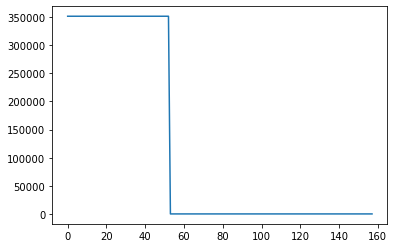

In [12]:
plt.plot(fitness_per_eval)
plt.show();

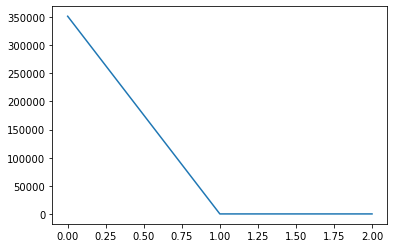

In [13]:
plt.plot(fitness_per_iter)
plt.show();

In [14]:
D = 500

# method = 'L-BFGS-B'
# options = {'maxiter': 100, 'gtol': 1e-5, 'disp': False}
method = 'SLSQP'
options = {'maxiter': 100, 'ftol': 1e-5, 'disp': False}

result, duration = optimize_minimize(D,search_space,method,options)

In [19]:
print("Algorithm: %s" % method)
print("Parameters: %s" % options)
print("Solution: %f - Fitness: %f" % (result.fun,fitness_per_eval[-1]))
print("Nb of functions evaluations: %d in %d iterations" % (result.nfev,result.nit))
print("Stopping criterion: %s" % result.message)
print("computanional time: %.3f seconds" % duration)

Algorithm: SLSQP
Parameters: {'maxiter': 100, 'ftol': 1e-05, 'disp': False}
Solution: -450.000000 - Fitness: 0.000000
Nb of functions evaluations: 1508 in 3 iterations
Stopping criterion: Optimization terminated successfully.
computanional time: 0.171 seconds


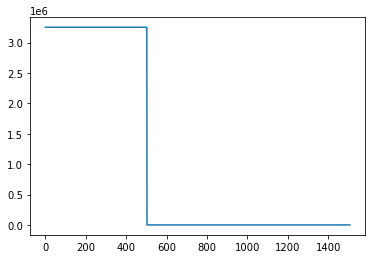

In [16]:
plt.plot(fitness_per_eval)
plt.show();

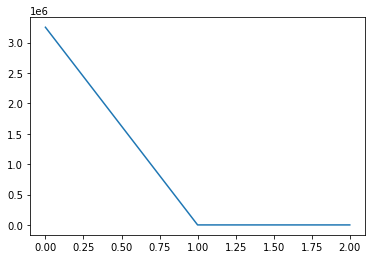

In [17]:
plt.plot(fitness_per_iter)
plt.show();